## Exercitiul 1 (2p)



1. Construiti o functie care primeste ca parametri doua numere intregi [a,b]. Functia construieste o lista cu toate numerele impare din interval, folosind list comprehension. (1p)

2. Modificati list comprehension ca sa selecteze numerele impare si o alta conditie la alegere, data printr-o functie in list comprehension (e.g. numerele mai mari ca 50). (1p)

In [ ]:
# punctul 2
def cond(n):
  return n > 50

# punctul 1
def gen_list(a: int, b: int):
  return [x for x in range(a, b + 1) if x % 2 == 1 and cond(x)]

gen_list(1, 100)

## Exercitiul 2 (4p)



**Reshape**
- Se da o lista de $n$ puncte in plan $2D$ cu valori aleatoare (e.g. facial keypoits). 
- Notam cu $x_i$ coordonata pe dimensiunea 1 si cu $y_i$ coordanata pe dimensiunea 2
$ [ x_1, y_1, x_2, y_2,  ... x_n, y_n] $

- Putem interpreta lista de puncte in doua moduri:
  - ```[(x1,y1),(x2,y2),(x3,y3) ... (xn, yn)]```
  - ```[(x1,x2,x3 ... xn),...(y1,y2,y3 ..., yn)]```


**Cerinte**: 
1. Folosind numpy arrays, afisati lista de coordonate sub urmatoarele formate: **(0.5p)** 
 - $ [x1, y1, x2, y2, x3, y3, ... xn, yn] $
 - $ [x1, x2, x3, ... xn, y1, y2, y3, ... yn] $
2. Creati o matrice cu dimensiunile *n x 2* care contine lista de puncte in ordine **row-major**  **(0.5p)**
 - **Hint**: Puteti folosi ```np.reshape```
3. Creati o matrice cu dimensiunile *2 x n* care contine lista de puncte in ordine **column-major**. **(0.5p)** 


 4. Folosind oricare din matricile de la pasii anteriori: 
  - Afisati doar punctele care au norma mai mare decat 0.5 . **(1p)** 
  - Calculati centrul de greutate al punctelor si dispersia lor. **(1.5p)**



In [ ]:
import random
import numpy as np
n, m = 5, 2 # 5 puncte cu 2 cooordonate x,y

# numarul de elemente din array liniarizat
k = n * m

# Punctul 1
my_data_list = np.array([random.random() for _ in range(k)])
# my_data_list = np.array([0.82129917, 0.38875904, 0.88916009, 0.93218121, 0.34977855, 0.30363898, 0.65745892, 0.81204919, 0.8175748,  0.19099364])

print("First format: ")  # [x1,y1,x2,y2,...,xn,yn]
print(my_data_list) 
print()

get_x = np.array(my_data_list[::2])
get_y = np.array(my_data_list[1::2])
print("Second format: ")  # [x1,x2,...,xn,y1,y2,...,yn]
print(np.concatenate((get_x, get_y), axis=0), "\n")

# Punctul 2 si 3
# Vom folosi tot lista generata la punctul 1
row_matrix = np.reshape(my_data_list, (n, 2)) 
column_matrix = np.reshape(my_data_list, (n, 2)).transpose()

print("Row-major matrix: \n", row_matrix, "\n")
print("Column-major matrix: \n", column_matrix, "\n")

# Punctul 4
# Vom folosi row_matrix generata la punctul 2

# Punctele cu norma > 0.5
print("Punctele de forma (xi, yi) cu norma > 0.5: ")
for row in row_matrix:
  if np.linalg.norm(row) > 0.5:
    print(row)

print("\nDispersia punctelor: ", np.std(row_matrix), "\n")

# Calculam centrul de greutate
# Pentru acesta ne vom folosi de matricea column_matrix,
# pentru ca aceasta este de forma [[x1,...][y1,...]]

G = []
for row in column_matrix:
  x = np.sum(row) / n
  G.append(x)

print("Coordonatele centrului de greutate al punctelor: (", G[0], ", ", G[1], ") \n")



First format: 
[0.96786174 0.06821278 0.97659278 0.90735982 0.16784356 0.40052538
 0.09710879 0.68648331 0.7545099  0.61107793]

Second format: 
[0.96786174 0.97659278 0.16784356 0.09710879 0.7545099  0.06821278
 0.90735982 0.40052538 0.68648331 0.61107793] 

Row-major matrix: 
 [[0.96786174 0.06821278]
 [0.97659278 0.90735982]
 [0.16784356 0.40052538]
 [0.09710879 0.68648331]
 [0.7545099  0.61107793]] 

Column-major matrix: 
 [[0.96786174 0.97659278 0.16784356 0.09710879 0.7545099 ]
 [0.06821278 0.90735982 0.40052538 0.68648331 0.61107793]] 

Punctele de forma (xi, yi) cu norma > 0.5: 
[0.96786174 0.06821278]
[0.97659278 0.90735982]
[0.09710879 0.68648331]
[0.7545099  0.61107793]

Dispersia punctelor:  0.33944090041758623 

Coordonatele centrului de greutate al punctelor: ( 0.5927833528819257 ,  0.5347318434738411 ) 



## Exercitiul 3 (4p)


- Incarcati o imagine in Google Colaboratory. Cititi imaginea de pe disk si afisati-o. **(1p)**
- Cresteti luminozitatea imaginii cu 25% fata de cea originala. Afisati imaginea rezultata. **(1p)**
- Cresteti contrastul imaginii cu 1.2x Afisati imaginea rezultata. **(1p)**
- Normalizati imaginea astfel incat sa avem mean 0 si stddev = 1. **(1p)**

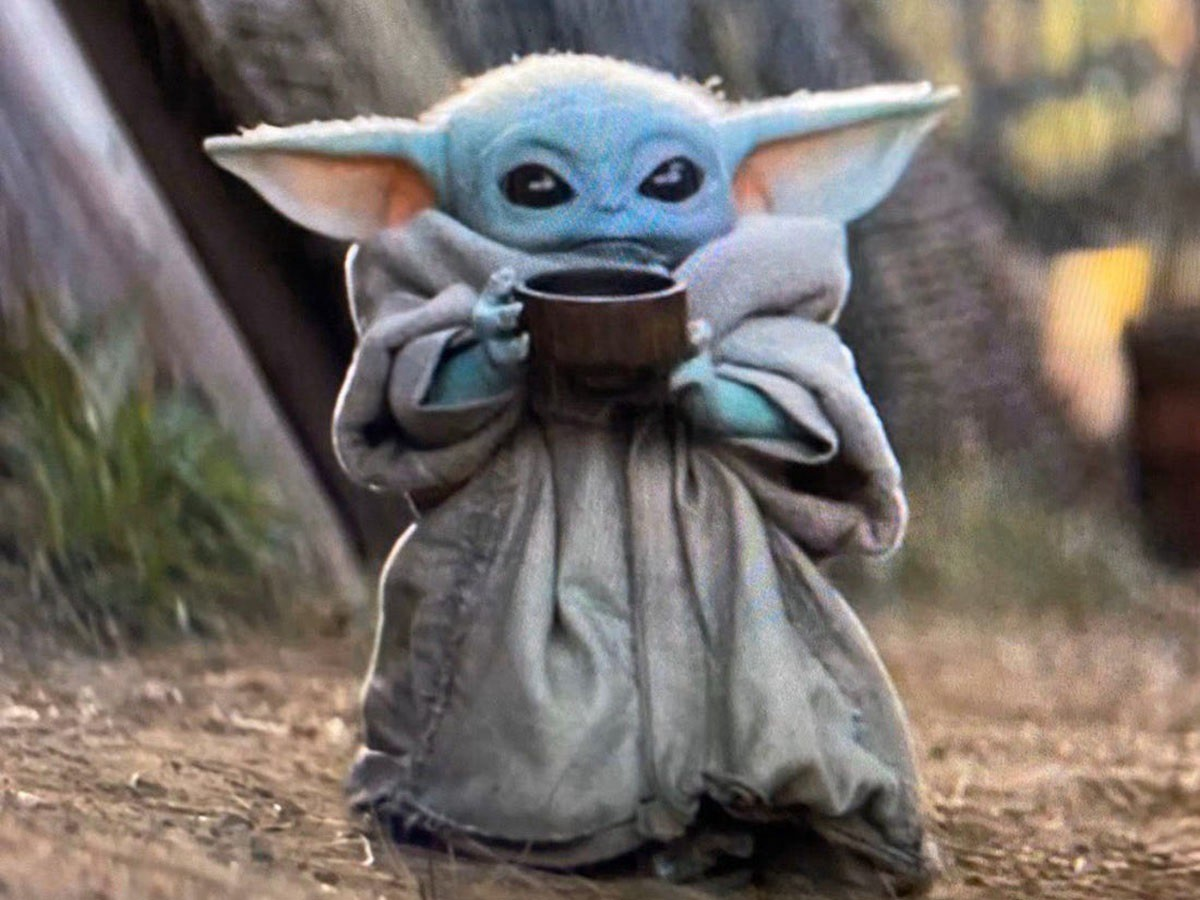

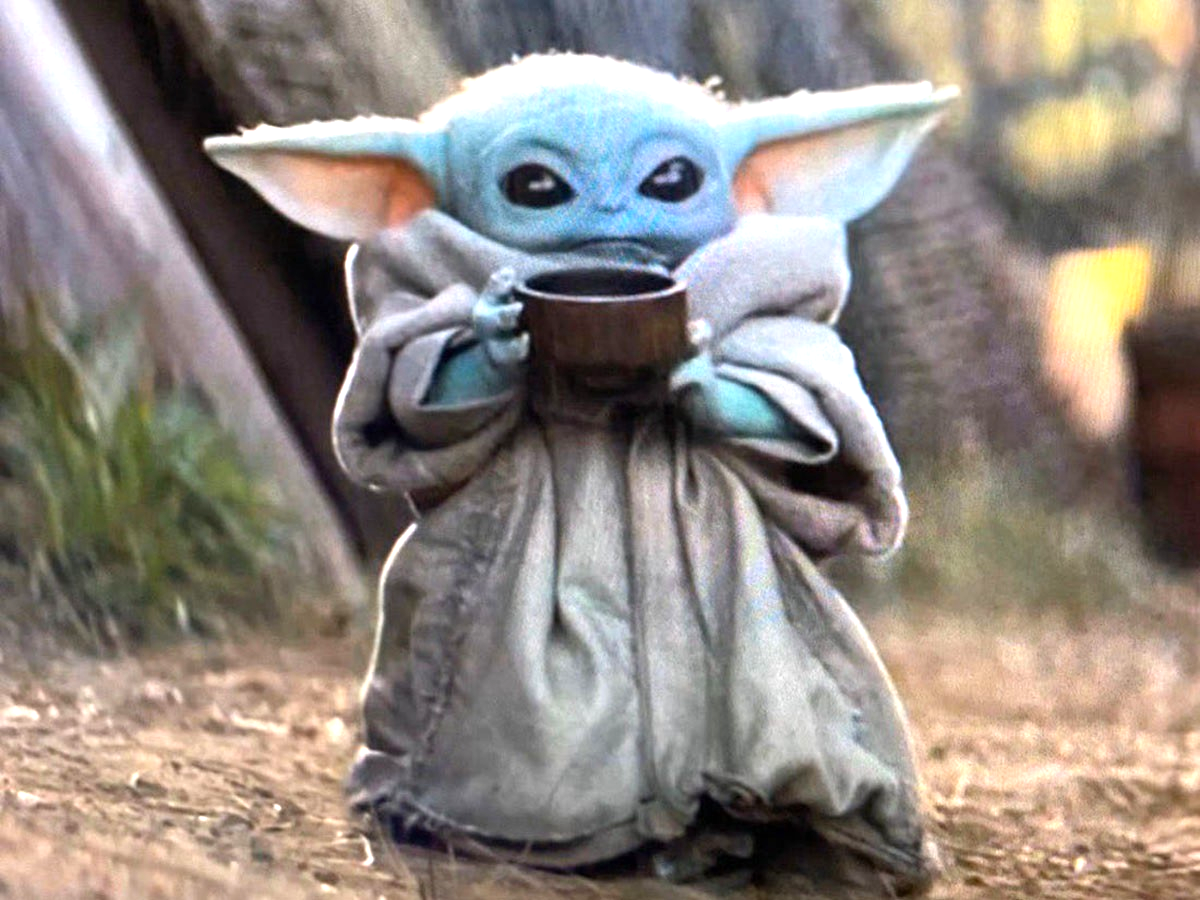

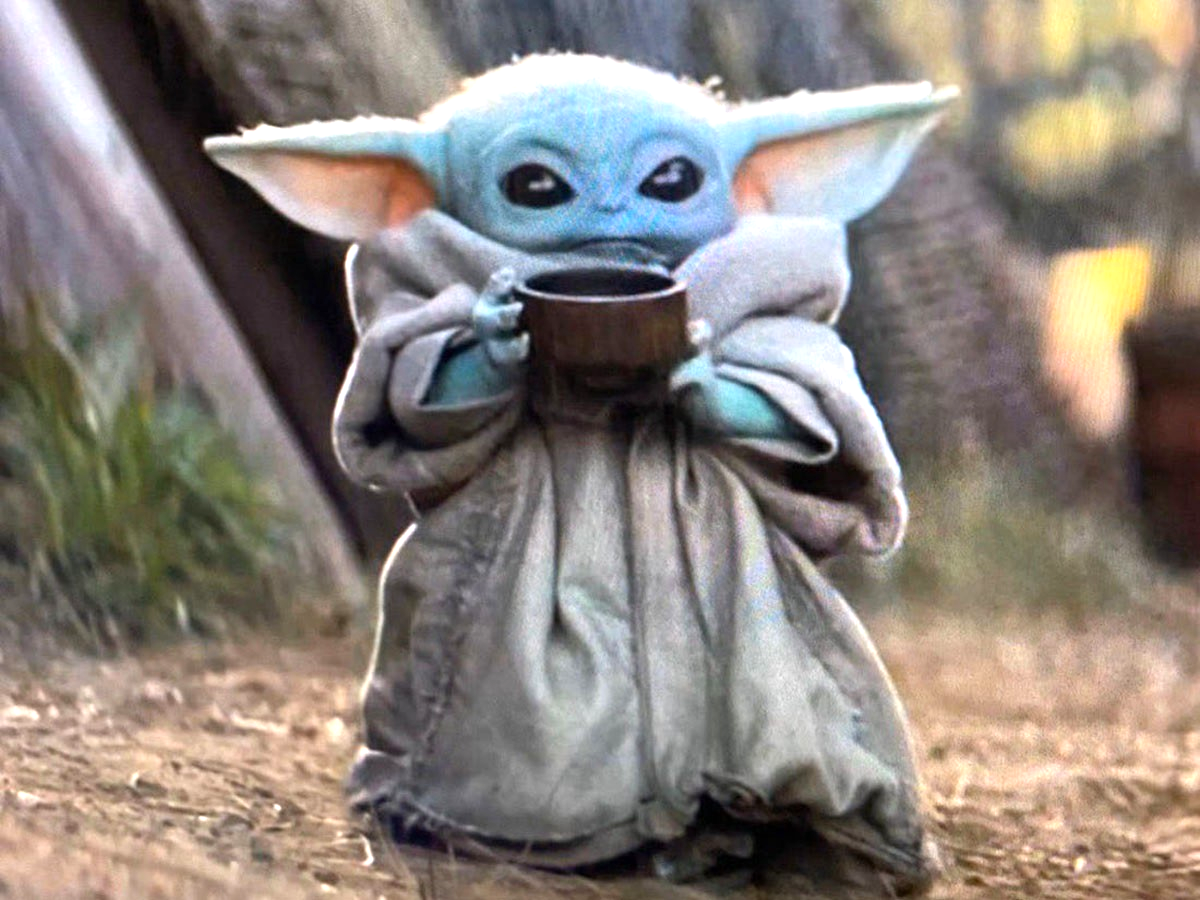

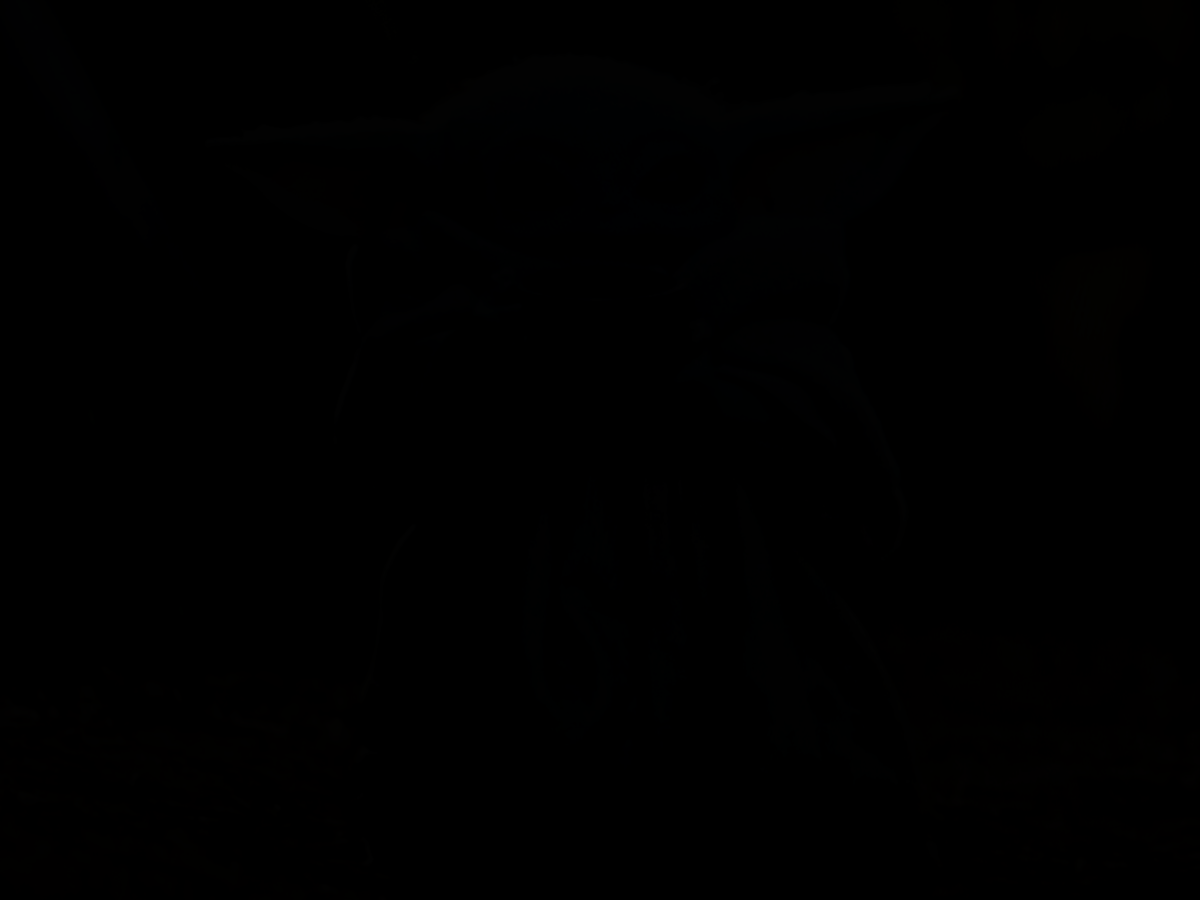

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Citim imaginea de pe disk si o afisam
image = cv2.imread('baby_yoda.jpeg')
cv2_imshow(image)
# print(np.shape(image))  (900, 1200, 3)

# Exercitiile urmatoare vor fi realizate cu ajutorul formulei:
# new_img = alpha * img + beta, unde:
#   beta - folosit la modif. luminozitatii
#   alpha - fol. la modif. contrastului

# Parcurgem fiecare pixel in parte si crestem luminozitatea cu 0.25%, avand grija
# in acelasi timp sa nu depasim valoarea maxima de 255 
bright_image = np.clip(image + 0.25 * image, 0, 255)
cv2_imshow(bright_image)

# Aplicam acelasi procedeu ca mai sus, acum modif. contrastul cu 1.2%
contrast_image = np.clip(image * 1.2, 0, 255)
cv2_imshow(contrast_image)

mean, stddev = cv2.meanStdDev(image)
norm_image = (image - mean.T) / stddev.T
cv2_imshow(norm_image)

# mean, stddev = cv2.meanStdDev(norm_image)
# print(mean.T <= 1e-10)  # True
# print(stddev.T - 1 <= 1e-10)  # True

